In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/mac/Desktop/Project/spaceship-titanic/train.csv')
test = pd.read_csv('/Users/mac/Desktop/Project/spaceship-titanic/test.csv')

In [3]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
data.shape

(8693, 14)

In [5]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
data.describe(include = object)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [7]:
data.describe(include = object)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [8]:
data['HomePlanet'].replace(np.nan, 'Earth', inplace = True)
data['CryoSleep'].replace(np.nan, 'False', inplace = True)
data['Destination'].replace(np.nan, 'TRAPPIST-1e', inplace = True)
data['VIP'].replace(np.nan, 'False', inplace = True)


In [9]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [10]:
data['Age'].replace(np.nan, data['Age'].mean(), inplace = True)
data['RoomService'].replace(np.nan, data['RoomService'].mean(), inplace = True)
data['FoodCourt'].replace(np.nan, data['FoodCourt'].mean(), inplace = True)
data['ShoppingMall'].replace(np.nan, data['ShoppingMall'].mean(), inplace = True)
data['Spa'].replace(np.nan, data['Spa'].mean(), inplace = True)
data['VRDeck'].replace(np.nan, data['VRDeck'].mean(), inplace = True)

In [11]:
print('Null', data.isnull().sum())
print('Duplicate', data.duplicated().sum())

Null PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64
Duplicate 0


In [12]:
data.drop(columns = ['Cabin', 'Name'], inplace = True)

In [13]:
data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

In [14]:
data['Age'] = data['Age'].astype(int)
data['CryoSleep'] = data['CryoSleep'].astype(str)
data['VIP'] = data['VIP'].astype(str)
data['Transported'] = data['Transported'].astype(str)

In [15]:
from sklearn.preprocessing import LabelEncoder
data['HomePlanet'] = LabelEncoder().fit(data['HomePlanet']).transform(data['HomePlanet'])
data['CryoSleep'] = LabelEncoder().fit(data['CryoSleep']).transform(data['CryoSleep'])
data['Destination'] = LabelEncoder().fit(data['Destination']).transform(data['Destination'])
data['VIP'] = LabelEncoder().fit(data['VIP']).transform(data['VIP'])

In [16]:
data['Transported'].replace({'True' : 1}, inplace = True)
data['Transported'].replace({'False' : 0}, inplace = True)

In [17]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,1,0,2,39,0,0.0,0.0,0.0,0.0,0.0,0
1,0002_01,0,0,2,24,0,109.0,9.0,25.0,549.0,44.0,1
2,0003_01,1,0,2,58,1,43.0,3576.0,0.0,6715.0,49.0,0
3,0003_02,1,0,2,33,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0004_01,0,0,2,16,0,303.0,70.0,151.0,565.0,2.0,1


In [18]:
from sklearn.model_selection import train_test_split
X = data.drop(columns = ['PassengerId', 'Transported'])
Y = data['Transported']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2)
print('Train shape', x_train.shape, y_train.shape)
print('Test shape', x_test.shape, y_test.shape)


Train shape (6085, 10) (6085,)
Test shape (2608, 10) (2608,)


In [19]:
from sklearn.preprocessing import StandardScaler
X_train_nor = StandardScaler().fit(x_train).transform(x_train)
X_test_nor = StandardScaler().fit(x_test).transform(x_test)
print(X_train_nor[:5])
print(X_test_nor[:5])

[[ 0.4405685  -0.72883662  0.62091665 -0.95571031 -0.15679051 -0.33302003
  -0.26721113 10.49575929 -0.27617992  0.21942112]
 [-0.81216951 -0.72883662  0.62091665 -0.53722886 -0.15679051 -0.33302003
  -0.28093901  1.05548219 -0.27261181  0.1629908 ]
 [-0.81216951 -0.72883662  0.62091665  0.50897477 -0.15679051 -0.01217496
   0.17083288 -0.28294636 -0.27617992 -0.27180021]
 [-0.81216951 -0.72883662  0.62091665 -0.8162165  -0.15679051 -0.30731674
  -0.27469907 -0.1673188  -0.27617992  0.69861632]
 [ 0.4405685  -0.72883662 -1.83330732 -0.46748195 -0.15679051  2.46721077
  -0.22977147 -0.28294636  2.42220602  1.95395973]]
[[ 1.70932324 -0.74198051  0.61967812  1.73915091 -0.14402653  0.76889744
  -0.11327956  0.50214128 -0.00239064 -0.26531296]
 [-0.82935273 -0.74198051  0.61967812  0.0653044  -0.14402653  0.76528085
  -0.30250889  0.74956318 -0.27779238 -0.16420276]
 [-0.82935273 -0.74198051  0.61967812  1.46017649 -0.14402653  0.97142657
  -0.28917394 -0.29903441 -0.25484223 -0.26210311]

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

search = GridSearchCV(LogisticRegression(), {
    'penalty' : ['l1', 'l2', 'elasticnet'], 
    'C' : [0.001, 0.01, 0.1, 1],
    'solver' : ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'], 
})

search.fit(X_train_nor, y_train)
search.cv_results_


/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

{'mean_fit_time': array([0.00092998, 0.00082545, 0.00495505, 0.00090504, 0.0179358 ,
        0.00639129, 0.01404843, 0.00647249, 0.01256242, 0.01422458,
        0.00112281, 0.00089979, 0.00104027, 0.00088859, 0.00208445,
        0.00098305, 0.00081172, 0.00777087, 0.00102797, 0.02440076,
        0.0082449 , 0.01899519, 0.00913458, 0.01704388, 0.02652655,
        0.00117478, 0.00086317, 0.00119896, 0.00086513, 0.00236921,
        0.0010222 , 0.00085206, 0.01041579, 0.00083518, 0.09437957,
        0.01154132, 0.02375789, 0.01116867, 0.03002324, 0.0668808 ,
        0.00089846, 0.00112934, 0.00123253, 0.00125761, 0.00260696,
        0.00090451, 0.00104475, 0.01104345, 0.00084815, 0.10207357,
        0.0122695 , 0.0252162 , 0.01180387, 0.04305372, 0.08552456,
        0.00090976, 0.00109344, 0.00093722, 0.00110073, 0.00215302]),
 'std_fit_time': array([1.51213070e-04, 3.89679541e-05, 7.80198854e-04, 6.80274681e-05,
        1.59377672e-03, 6.23033632e-04, 4.10526792e-04, 2.74863456e-04,
     

In [21]:
logistic_data = pd.DataFrame(search.cv_results_)
logistic_data[['param_penalty', 'param_C', 'param_solver', 'mean_test_score']].sort_values(by = 'mean_test_score', ascending = False)

,param_penalty,param_C,param_solver,mean_test_score
47,l1,1,liblinear,0.782909
49,l1,1,saga,0.782744
53,l2,1,sag,0.781923
52,l2,1,liblinear,0.781923
51,l2,1,newton-cg,0.781923
50,l2,1,lbfgs,0.781923
54,l2,1,saga,0.781430
34,l1,0.1,saga,0.779622
32,l1,0.1,liblinear,0.779622
37,l2,0.1,liblinear,0.776007


In [22]:
print('Best estimator', search.best_estimator_)
print('Best parameter', search.best_params_)
print('Best score', search.best_score_)

Best estimator LogisticRegression(C=1, penalty='l1', solver='liblinear')
Best parameter {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score 0.7829087921117501


In [23]:
lr = LogisticRegression(C = 0.1, penalty = 'l1', solver = 'liblinear')
lr.fit(X_train_nor, y_train)
predictions = lr.predict(X_test_nor)
print('Accuracy score', accuracy_score(y_test, predictions))

Accuracy score 0.7921779141104295


In [24]:
print('Values count', data['HomePlanet'].value_counts())
print('Values count', data['CryoSleep'].value_counts())
print('Values count', data['Destination'].value_counts())
print('Values count', data['Age'].value_counts())
print('Values count', data['VIP'].value_counts())

Values count 0    4803
1    2131
2    1759
Name: HomePlanet, dtype: int64
Values count 0    5656
1    3037
Name: CryoSleep, dtype: int64
Values count 2    6097
0    1800
1     796
Name: Destination, dtype: int64
Values count 28    446
24    324
18    320
21    311
19    293
     ... 
72      4
78      3
79      3
76      2
77      2
Name: Age, Length: 80, dtype: int64
Values count 0    8494
1     199
Name: VIP, dtype: int64


In [25]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

search_ = GridSearchCV(DecisionTreeClassifier(), {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'], 
    'max_depth' : [5], 
    'min_samples_split' : [2],
})

search_.fit(X_train_nor, y_train)
search_.cv_results_

{'mean_fit_time': array([0.0167141 , 0.00299287, 0.01000447, 0.00277205, 0.00986609,
        0.0035676 ]),
 'std_fit_time': array([5.44518453e-03, 4.41497986e-04, 5.80072577e-04, 6.38549586e-05,
        4.69915087e-04, 5.29334792e-04]),
 'mean_score_time': array([0.00336308, 0.00136795, 0.00117445, 0.00103531, 0.00118914,
        0.00104446]),
 'std_score_time': array([0.00134618, 0.00090961, 0.00027699, 0.00032746, 0.0002499 ,
        0.00017496]),
 'param_criterion': masked_array(data=['gini', 'gini', 'entropy', 'entropy', 'log_loss',
                    'log_loss'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[5, 5, 5, 5, 5, 5],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 2, 2, 2, 2, 2],
              mask=[False, False, False, False, False, False],
       

In [26]:
tree_data = pd.DataFrame(search_.cv_results_)
tree_data[['param_criterion', 'param_max_depth', 'param_min_samples_split', 'param_splitter', 'mean_test_score']].sort_values(by = 'mean_test_score', ascending = False)

,param_criterion,param_max_depth,param_min_samples_split,param_splitter,mean_test_score
0,gini,5,2,best,0.762859
2,entropy,5,2,best,0.761216
4,log_loss,5,2,best,0.761216
1,gini,5,2,random,0.740016
5,log_loss,5,2,random,0.736894
3,entropy,5,2,random,0.734100


In [27]:
print('Best estimator', search_.best_estimator_)
print('Best parameter', search_.best_params_)
print('Best score', search_.best_score_)

Best estimator DecisionTreeClassifier(max_depth=5)
Best parameter {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2, 'splitter': 'best'}
Best score 0.762859490550534


In [28]:
decision_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_split = 2, splitter = 'best')
decision_tree.fit(X_train_nor, y_train)
prediction = decision_tree.predict(X_test_nor)
print('Accuracy_score', accuracy_score(y_test, prediction))

Accuracy_score 0.7841257668711656


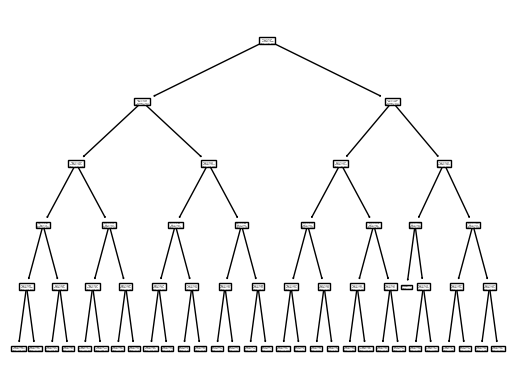

In [29]:
tree.plot_tree(decision_tree)
plt.show()

In [30]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [31]:
test.drop(columns = ['Name', 'Cabin'], inplace = True)

In [32]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [33]:
test.describe(include = object)

,PassengerId,HomePlanet,CryoSleep,Destination,VIP
count,4277,4190,4184,4185,4184
unique,4277,3,2,3,2
top,0013_01,Earth,False,TRAPPIST-1e,False
freq,1,2263,2640,2956,4110


In [34]:
test['HomePlanet'].replace(np.nan, 'Earth', inplace = True)
test['CryoSleep'].replace(np.nan, 'False', inplace = True)
test['Destination'].replace(np.nan, 'TRAPPIST-1e', inplace = True)
test['VIP'].replace(np.nan, 'False', inplace = True)

In [35]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [36]:
test['Age'].replace(np.nan, test['Age'].mean(), inplace = True)
test['RoomService'].replace(np.nan, test['RoomService'].mean(), inplace = True)
test['FoodCourt'].replace(np.nan, test['FoodCourt'].mean(), inplace = True)
test['ShoppingMall'].replace(np.nan, test['ShoppingMall'].mean(), inplace = True)
test['Spa'].replace(np.nan, test['Spa'].mean(), inplace = True)
test['VRDeck'].replace(np.nan, test['VRDeck'].mean(), inplace = True)

In [37]:
print('Null', test.isnull().sum())
print('Duplicated', test.duplicated().sum())

Null PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64
Duplicated 0


In [38]:
test.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object

In [39]:
test['Age'] = test['Age'].astype(int)
test['CryoSleep'] = test['CryoSleep'].astype(str)
test['VIP'] = test['VIP'].astype(str)

In [40]:
test['HomePlanet'] = LabelEncoder().fit(test['HomePlanet']).transform(test['HomePlanet'])
test['CryoSleep'] = LabelEncoder().fit(test['CryoSleep']).transform(test['CryoSleep'])
test['Destination'] = LabelEncoder().fit(test['Destination']).transform(test['Destination'])
test['VIP'] = LabelEncoder().fit(test['VIP']).transform(test['VIP'])

In [41]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,0,1,2,27,0,0.0,0.0,0.0,0.0,0.0
1,0018_01,0,0,2,19,0,0.0,9.0,0.0,2823.0,0.0
2,0019_01,1,1,0,31,0,0.0,0.0,0.0,0.0,0.0
3,0021_01,1,0,2,38,0,0.0,6652.0,0.0,181.0,585.0
4,0023_01,0,0,2,20,0,10.0,0.0,635.0,0.0,0.0


In [42]:
x = test.drop(columns = ['PassengerId'])
x_nor = StandardScaler().fit(x).transform(x)
print('x_nor.shape', x_nor.shape)

x_nor.shape (4277, 10)


In [43]:
y_predictions = lr.predict(x_nor)
y_prediction = decision_tree.predict(x_nor)
y_prediction.reshape(4277, 1)
y_predictions.reshape(4277, 1)

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [44]:
submission_lr = pd.DataFrame(y_predictions)
test = pd.concat([test, submission_lr], axis = 1)
test.drop(columns = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], inplace = True)
test.rename(columns = {0 : 'Transported'}, inplace = True)
test.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,0


In [45]:
test['Transported'] = test['Transported'].astype(bool)
test.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [46]:
test.to_csv('/Users/mac/Desktop/Submission_LR.csv', index = False)

In [47]:
submission_dt = pd.DataFrame(y_prediction)
test = pd.concat([test, submission_dt], axis = 1)
test.drop(columns = ['Transported'], inplace = True)
test.rename(columns = {0 : 'Transported'}, inplace = True)
test.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1


In [48]:
test['Transported'] = test['Transported'].astype(bool)
test.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [49]:
test.to_csv('/Users/mac/Desktop/Submission_DT.csv', index = False)